# End to End Project - Predicting Heart Disease using machine learning 

This notebook looks into using Python based machine learning and Data Science 
libraries in an attempt to build a machine learning model capable of predicting whether nr not
someone has heart disease, based on their medical history.

We are going to take the following approach:

1. Problem Definition
2. Data 
3. Evaluation
4. Fetaures
5. Modelling
6. Experimentation


## 1. Problem Defintion

> Given a patients medical history can we predict whether or not a patient has heart disease ?


## 2. Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


## 3. Evaluation

> If we cam reach 95% accuracy at predicting whether or not patient has heart disease 
during the proof of concept.

## 4. Features

> Information of about each feature in the data set.

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
     * serum = LDL + HDL + .2 * triglycerides
     * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
     * 0: Nothing to note
     * 1: ST-T Wave abnormality 
          * can range from mild symptoms to severe problems.
          * signals non-normal heart beat.
     * 2: Possible or definite left ventricular hypertrophy
       * Enlarged heart's main pumping chamber.
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Tools

* Using libraries:
    * Pandas 
    * Numpy
    * Matplotlib
    * Seaborn
    * Sckit-learn

In [641]:
# import all the tools we need

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#import evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# import preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Exploratory Data Analysis

In [248]:
sns.set_style('darkgrid')

### Load and Read data

In [5]:
df = pd.read_csv('heart-disease.csv')

In [191]:
data = df.copy()

In [193]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


### Features 

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> No missing values in the data set

### Checking Features of various attribute

#### Sex 
#### `Male : 1 and Female : 0`

In [195]:
sex_plot = data.groupby(['target','sex']).size().reset_index().pivot(columns='target',index='sex',values=0)

In [196]:
sex_plot

target,0,1
sex,,
0,24,72
1,114,93


In [197]:
sex_plot.rename(columns={0:'NoHeartDisease',1:'HeartDisease'},inplace=True)
sex_plot.rename(index={0:'Female',1:'Male'},inplace=True)

In [198]:
sex_plot

target,NoHeartDisease,HeartDisease
sex,,
Female,24,72
Male,114,93


<AxesSubplot:xlabel='sex'>

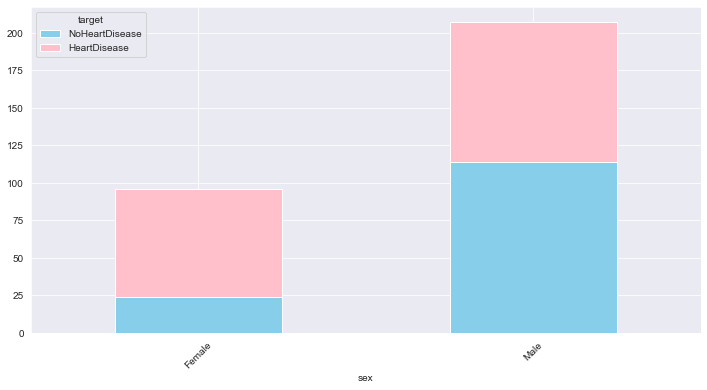

In [249]:
fig,ax= plt.subplots(figsize=(12,6))
sex_plot.plot(kind='bar',stacked=True,color=['skyblue','pink'],rot=45,ax=ax)

In [201]:
print("Percentage of Female Patients with heart disease: {:.2f}%".format((sex_plot['HeartDisease']['Female']) / (sex_plot['NoHeartDisease']['Female']+ sex_plot['HeartDisease']['Female'])*100))
print("Percentage of Male Patients with heart disease: {:.2f}%".format((sex_plot['HeartDisease']['Male']) / (sex_plot['NoHeartDisease']['Male']+ sex_plot['HeartDisease']['Male'])*100))


Percentage of Female Patients with heart disease: 75.00%
Percentage of Male Patients with heart disease: 44.93%


In [202]:
## Generally 
gen_prob  = (75 + 45)/2

In [203]:
gen_prob

60.0

> ##### Based on the existing dataset there's a 75% chance a Female has a heart disease ,44% chance when a patient is male and Generally theres a 60% chance a patient has a heart disease.

#### Chest Pain 

* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [204]:
cp_plot = data.groupby(['cp','target']).size().reset_index().pivot(columns='target',index='cp',values=0)

In [205]:
cp_plot

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [206]:
cp_plot.rename(columns={0:'NoHeartDisease',1:'HeartDisease'},inplace=True)
cp_plot.rename(index={0:'Typical Angina',1:'Atypical Angina',2:'Non-anginal pain',3:'Asymptomatic pain'},inplace=True)

In [207]:
cp_plot

target,NoHeartDisease,HeartDisease
cp,,
Typical Angina,104,39
Atypical Angina,9,41
Non-anginal pain,18,69
Asymptomatic pain,7,16


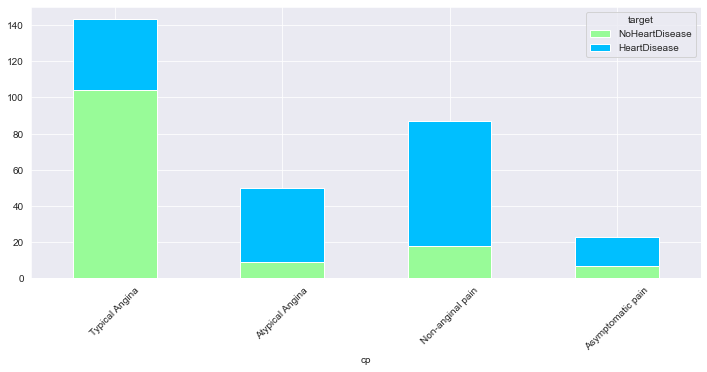

In [250]:
fig,ax= plt.subplots(figsize=(12,5))
cp_plot.plot(kind='bar',stacked=True,color=['palegreen','deepskyblue'],rot=45,ax=ax);

In [217]:
print("Percentage of Typical angina patients with heart disease : {:.2f}%".format((cp_plot['HeartDisease']['Typical Angina']) / (cp_plot['HeartDisease']['Typical Angina']+cp_plot['NoHeartDisease']['Typical Angina'])*100))
print("Percentage of Atypical angina patients with heart disease : {:.2f}%".format((cp_plot['HeartDisease']['Atypical Angina']) / (cp_plot['HeartDisease']['Atypical Angina']+cp_plot['NoHeartDisease']['Atypical Angina'])*100))
print("Percentage of Non-anginal pain patients with heart disease : {:.2f}%".format((cp_plot['HeartDisease']['Non-anginal pain']) / (cp_plot['HeartDisease']['Non-anginal pain']+cp_plot['NoHeartDisease']['Non-anginal pain'])*100))
print("Percentage of Asymptomatic angina patients with heart disease : {:.2f}%".format((cp_plot['HeartDisease']['Asymptomatic pain']) / (cp_plot['HeartDisease']['Asymptomatic pain']+cp_plot['NoHeartDisease']['Asymptomatic pain'])*100))

Percentage of Typical angina patients with heart disease : 27.27%
Percentage of Atypical angina patients with heart disease : 82.00%
Percentage of Non-anginal pain patients with heart disease : 79.31%
Percentage of Asymptomatic angina patients with heart disease : 69.57%


##### `Chest pain related to Sex`

In [218]:
cp_sex_plot = data.groupby(['sex','cp']).size().reset_index().pivot(columns='sex',index='cp',values=0)

In [219]:
cp_sex_plot

sex,0,1
cp,,
0,39,104
1,18,32
2,35,52
3,4,19


In [222]:
cp_sex_plot.rename(columns={0:'Female',1:'Male'},inplace=True)
cp_sex_plot.rename(index={0:'Typical Angina',1:'Atypical Angina',2:'Non-anginal pain',3:'Asymptomatic pain'},inplace=True)

In [223]:
cp_sex_plot

sex,Female,Male
cp,,
Typical Angina,39,104
Atypical Angina,18,32
Non-anginal pain,35,52
Asymptomatic pain,4,19


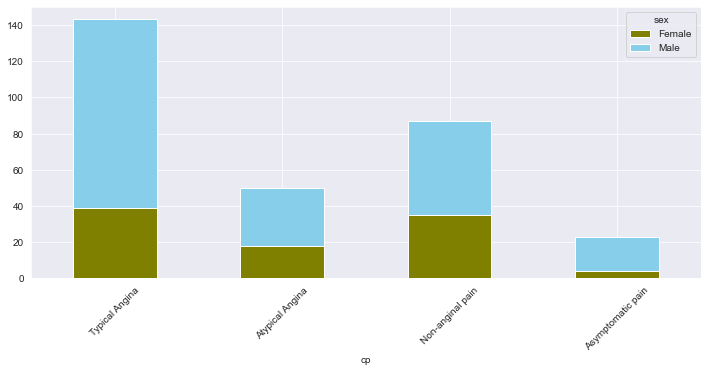

In [251]:
fig,ax= plt.subplots(figsize=(12,5))
cp_sex_plot.plot(kind='bar',stacked=True,color=['olive','skyblue'],rot=45,ax=ax);

In [225]:
print("Percentage of Typical angina male patients : {:.2f}%".format((cp_sex_plot['Male']['Typical Angina']) / (cp_sex_plot['Male'].sum())*100))
print("Percentage of Typical angina female patients  : {:.2f}%".format((cp_sex_plot['Female']['Typical Angina']) / (cp_sex_plot['Female'].sum())*100))


Percentage of Typical angina male patients : 50.24%
Percentage of Typical angina female patients  : 40.62%


#### Age 

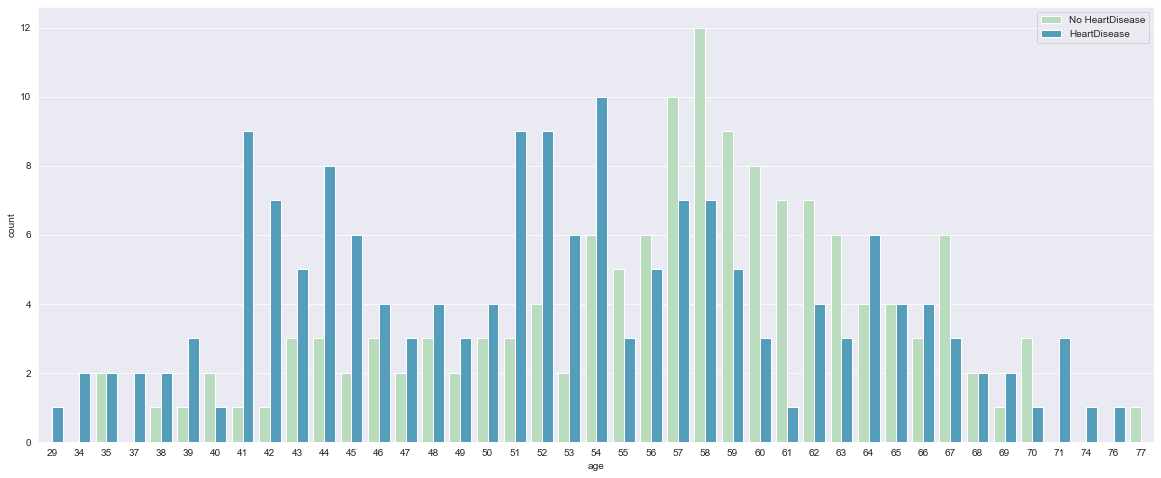

In [252]:
fig,ax = plt.subplots(figsize=(20,8))
sns.countplot(data=data,x='age',hue='target',palette='GnBu',ax=ax)
ax.legend(['No HeartDisease','HeartDisease'],loc='upper right');

##### `Age vs Maximum heart rate`

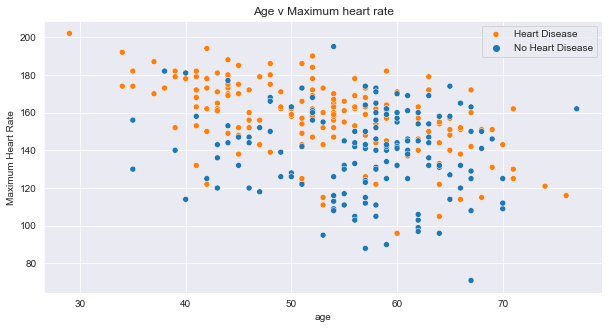

In [253]:
fig,ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=data,x=data.age,
               y=data.thalach,hue='target',ax=ax)

ax.set_ylabel('Maximum Heart Rate')
ax.set_title('Age v Maximum heart rate')
ax.legend(['Heart Disease','No Heart Disease'])

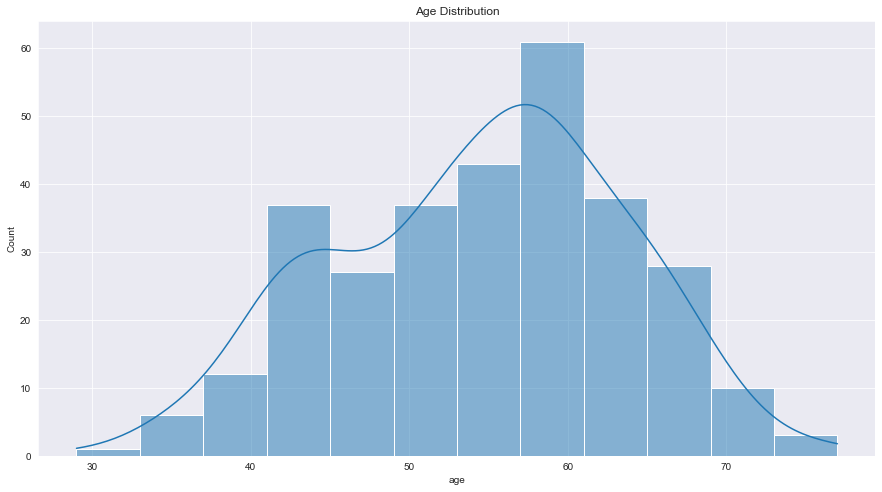

In [283]:
## Check distribution of age
fig,ax = plt.subplots(figsize=(15,8))
sns.histplot(x=data['age'],kde=True,ax=ax)
ax.set_title('Age Distribution')
plt.show()

#### Exang
`exang - exercise induced angina (1 = yes; 0 = no)`

In [311]:
exang_plt=pd.crosstab(data.exang,data.target)

In [312]:
exang_plt

target,0,1
exang,,
0,62,142
1,76,23


In [313]:
exang_plt.rename(columns={0:'NoHeartDisease',1:'HeartDisease'},inplace=True)
exang_plt.rename(index={0:'NoInduced Angina',1:'Exercise Induced Angina'},inplace=True)

In [314]:
exang_plt

target,NoHeartDisease,HeartDisease
exang,,
NoInduced Angina,62,142
Exercise Induced Angina,76,23


<AxesSubplot:xlabel='exang'>

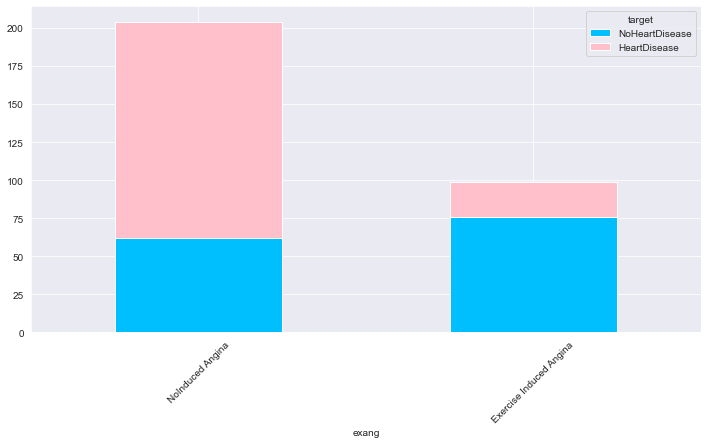

In [320]:
fig,ax= plt.subplots(figsize=(12,6))
exang_plt.plot(kind='bar',stacked=True,color=['deepskyblue','pink'],rot=45,ax=ax)

In [324]:
exang_plt['HeartDisease']['NoInduced Angina']

142

In [331]:
non_induced_angina=exang_plt['HeartDisease']['NoInduced Angina'] / (exang_plt['HeartDisease']['NoInduced Angina']+exang_plt['NoHeartDisease']['NoInduced Angina'])*100
exercised_induced_angina= exang_plt['HeartDisease']['Exercise Induced Angina'] / (exang_plt['HeartDisease']['Exercise Induced Angina']+exang_plt['NoHeartDisease']['Exercise Induced Angina'])*100

In [334]:
print("{:.2f}% of heart disease patients had exercised Induced Angina".format(exercised_induced_angina))
print("{:.2f}% of heart disease patients had No exercise Induced Angina".format(non_induced_angina))

23.23% of heart disease patients had exercised Induced Angina
69.61% of heart disease patients had No exercise Induced Angina


#### Correlation of all features

In [294]:
corr_plt = data.corr()

In [295]:
corr_plt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


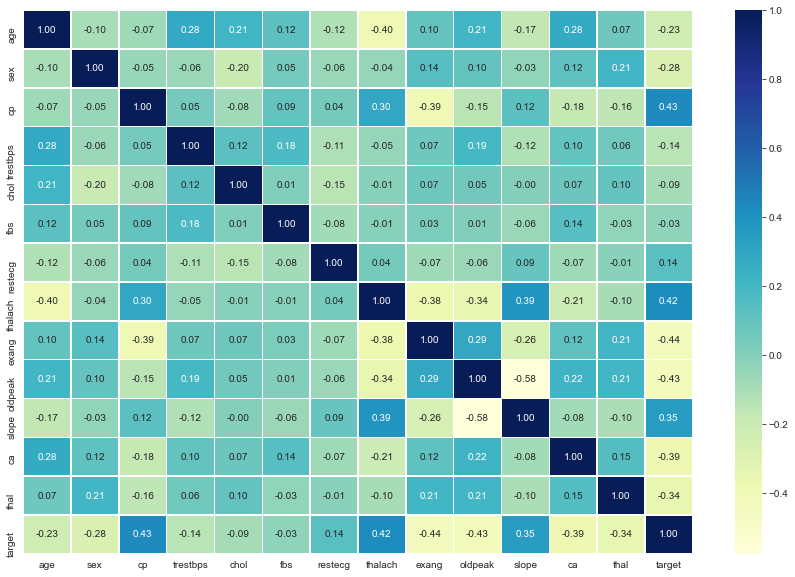

In [351]:
## Plot our corr matrix
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_plt,
                annot=True,
                linewidths=.50,
                fmt='.2f',
                cmap='YlGnBu');

# Modeling
* Estimators used :
    * Logistic Regression
    * KNN 
    * Random Forest
    * Naive Bayes
    * SVC

#### Split Data into train and test set


In [620]:
x = data.drop('target',axis=1)

y = data['target']

In [621]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.20)

#### Data Preprocessing 
`Scaling the features`

In [645]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

#### Base Models

In [646]:
## models in dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier(),
         'Naive Bayes': GaussianNB(),
         'Support Vector':SVC()}

# helper function to fit and score models
def fit_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate a given machine learning model
    
    models : a dict of sckit-learn ml models
    X_train : training data 
    X_test : testing data
    y_train : training labels
    y_test : testing labels
    
    """
    np.random.seed(42)
    
    # Make a dict to keep model scores
    model_scores = {}
    
    #Loop through models
    for name,model in models.items():
        
        #Fit the model to the data
        model.fit(X_train,y_train)
        
        #Evaluating the models and save in the models score dict
        model_scores[name] = np.round(model.score(X_test,y_test)*100)
    return model_scores
    

In [647]:
model_scores = fit_score(models=models,
                         X_train=x_train,
                         X_test=x_test,
                         y_train=y_train,
                         y_test=y_test)

In [648]:
model_scores

{'Logistic Regression': 85.0,
 'KNN': 90.0,
 'RandomForest': 84.0,
 'Naive Bayes': 87.0,
 'Support Vector': 87.0}

#### Model Comparison

In [649]:
models_df = pd.DataFrame(model_scores,index=['accuracy'])
models_df

,Logistic Regression,KNN,RandomForest,Naive Bayes,Support Vector
accuracy,85.0,90.0,84.0,87.0,87.0


<AxesSubplot:>

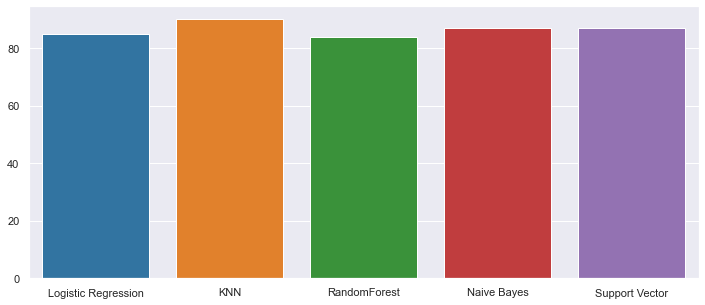

In [650]:
plt.figure(figsize=(12,5))
sns.barplot(data=models_df)

> With our base models K-Nearest Neighbor model has the Highest Accuracy score of 90%

#### Model Tuning
* Models to tune :
    * KNN
    * Naive Bayes
    * SVC
    * Logistic Regression

#### KNN Tuning with GridSearchCV

In [651]:
## different hyperparameters in knn model
knn_params = [{'n_neighbors':[7],
               'metric': ['euclidean'],
               'weights':['uniform','distance']}]

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid=knn_params,
                       cv=5,
                       verbose=True)

# fit grid search to the model
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean'], 'n_neighbors': [7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [652]:
## best params
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

In [653]:
# Evaluate the grid search KNN model
model_score={}
model_score['KNN'] = knn_grid.score(x_test,y_test)*100

#### Naive Bayes with GridSearchCV

In [654]:
naive_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_grid = GridSearchCV(estimator=GaussianNB(),
                          param_grid=naive_params,
                         cv=5,
                         verbose=True)
naive_grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=True)

In [655]:
model_score['Naive Bayes']=naive_grid.score(x_test,y_test)*100

#### Support Vector

In [661]:
svc_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_grid = GridSearchCV(estimator=SVC(),
                        param_grid=svc_params,
                       cv=5,
                       verbose=True)

svc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=True)

In [662]:
model_score['Support Vector']=svc_grid.score(x_test,y_test)*100

#### Logistic Regression

In [669]:
lg_params = [{
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']} ]                           


lg_grid =  GridSearchCV(estimator=LogisticRegression(),param_grid=lg_params,
                        cv=5,
                        verbose=True)


lg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\raiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\raiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\raiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\raiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\raiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'class_weight': ['balanced'],
                          'max_iter': [20, 50, 100, 200, 500, 1000],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [670]:
model_score['Logistic Regression']=lg_grid.score(x_test,y_test)*100

In [671]:
models_df = pd.DataFrame(model_score,index=['accuracy'])
models_df

,KNN,Naive Bayes,Support Vector,Logistic Regression
accuracy,91.803279,88.52459,85.245902,83.606557


<AxesSubplot:>

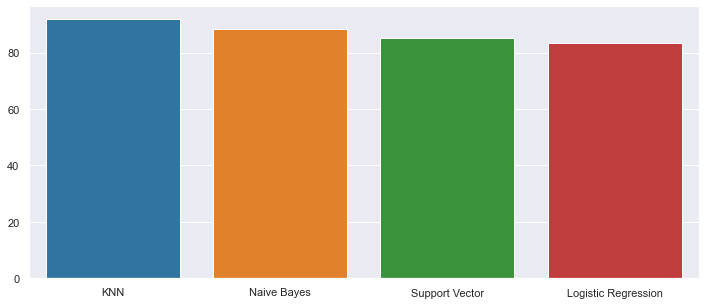

In [672]:
plt.figure(figsize=(12,5))
sns.barplot(data=models_df)

# Model Evaluation

Models used for evaluation :
* K-Nearest Neighbors 
* Naive Bayes

In [679]:
## predictions
y_preds_knn = knn_grid.predict(x_test)
y_preds_naive = naive_grid.predict(x_test)

#### ROC curve and AUC metric

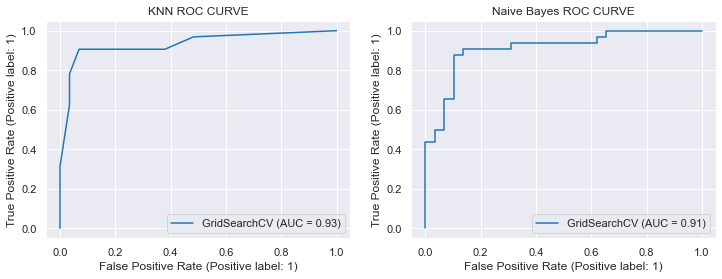

In [709]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax1.set_title('KNN ROC CURVE')
plot_roc_curve(knn_grid,x_test,y_test,ax=ax1);

ax2.set_title('Naive Bayes ROC CURVE')
plot_roc_curve(naive_grid,x_test,y_test,ax=ax2);


#### Confusion Matrix

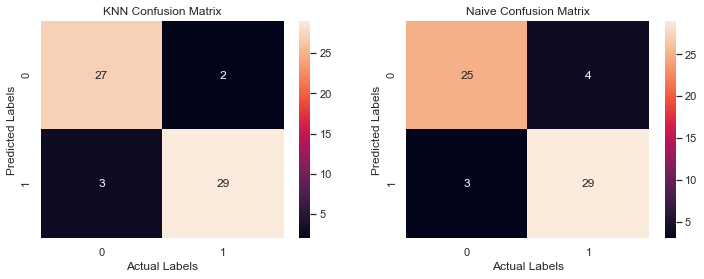

In [715]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))

sns.heatmap(confusion_matrix(y_test,y_preds_knn),annot=True,ax=ax1);
ax1.set_title('KNN Confusion Matrix')
ax1.set_xlabel('Actual Labels')
ax1.set_ylabel('Predicted Labels')

sns.heatmap(confusion_matrix(y_test,y_preds_naive),annot=True,ax=ax2);
ax2.set_title('Naive Confusion Matrix')
ax2.set_xlabel('Actual Labels')
ax2.set_ylabel('Predicted Labels')

plt.show()



#### Calculating Recall using Cross-Validation
* KNN
* Naive Bayes

#### Choice of the adequate scoring
Since we are dealing with a disease problem, it's more convenient to use the recall score to evaluate our models, because it will be more safer for patient if we raise the percentage of cases correctly identified as positive out of total true positives

In [718]:
recall_scores={}

In [719]:
## cross validated recall
cv_recall = cross_val_score(knn_grid.best_estimator_,
                            x,
                            y,
                            cv=10,
                            scoring='recall')

recall_scores['KNN'] =np.mean(cv_recall)

In [720]:
## cross validated recall
cv_recall_naive = cross_val_score(naive_grid.best_estimator_,
                            x,
                            y,
                            cv=10,
                            scoring='recall')

recall_scores['Naive Bayes'] =np.mean(cv_recall_naive)

In [722]:
models_df = pd.DataFrame(recall_scores,index=['recall'])
models_df

,KNN,Naive Bayes
recall,0.726838,0.932353


<AxesSubplot:>

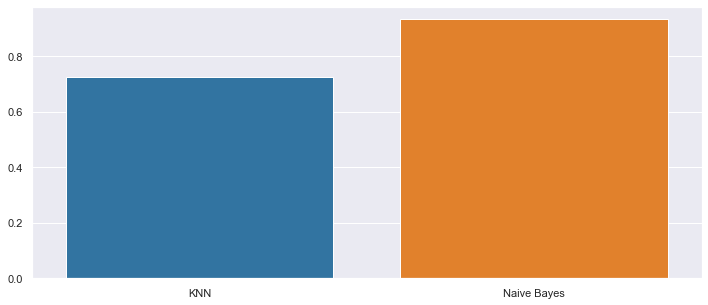

In [723]:
plt.figure(figsize=(12,5))
sns.barplot(data=models_df)

### Naive Bayes has the highest Recall of 93%